# <a href="https://thetahat.ru/courses/bm-2024-aut">Статистика ФБМФ</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 25 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 35 баллов


-----

In [2]:
# Bot check

# HW_ID: st_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [204]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='Set2')

### <b><i><font color="blue">Легкая часть</font></i></b> 


## Задача 1 (из прошлого ДЗ)

Для построения критериев можно использовать доверительные интервалы для параметра распределения.

Пусть $X = (X_1,...,X_n)$ &mdash; выборка из распределения $P \in \{P_{\theta} | \theta \in \Theta\}$. Доверительный интервал $(T_1(x), T_2(x))$ уровня доверия 0.95 покрывает истинное значение параметра $\theta$ в 95% случаев и не покрывает его в оставшихся 5%.

Рассмотрим гипотезу $H_0: \theta = \theta_0$ и критерий ее отвержения $S = \{x | \theta_0 \not\in (T_1(x), T_2(x))\}$. Если истинное значение параметра равно $\theta_0$, то мы будем отвергать гипотезу только в 5% случаев (исходя из уровня доверия доверительного интервала), контролируя ошибку первого рода. Чем сильнее значение $\theta$ отличается от $\theta_0$, тем меньше шанс, что доверительный интервал покроет $\theta_0$, а значит мощность теста будет расти, чего мы и хотим.

Также для построения критериев можно использовать и асимптотические доверительные интервалы. В таком случае критерий будет являться асимптотическим с уровнем значимости $\alpha$, а при малых размерах выборки ошибка первого рода может сильно отличаться от теоретической.

Рассмотрим $X = (X_1,...,X_n)$ &mdash; выборку из распределение Пуассона с параметром $\theta$. Будем проверять $H_0: \theta = 1 \ \ vs \ \ H_1: \theta \neq 1$. 

1. Запишите формулу асимптотического доверительного интервала **уровня доверия $1 - \alpha$** и допишите функцию, которая его строит для всех подвыборок $X$.

    *$\alpha$ здесь и далее равна 0.05 и имеет смысл уровня значимости критерия, поэтому доверительный интервал необходимо строить для уровня доверия $1 - \alpha$.*

АДИ:

$$C = \left( \hat{\theta} - \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}, \hat{\theta} + \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}\right)$$

Для распределения Пуассона:
$$\hat{\theta} = \overline{X}$$
$$\hat{\sigma} = \sqrt{\overline{X}}$$
Тогда АДИ:
$$C = \left(\overline{X} - \frac{z_{1-\alpha/2}\sqrt{\overline{X}}}{\sqrt{n}}, \overline{X} + \frac{z_{1-\alpha/2} \sqrt{\overline{X}}}{\sqrt{n}}\right)$$


In [361]:
def asymptotic_confidence_interval(sample, cumulative=True, alpha=0.05):
    '''
    Строит левую и правую границы 
    асимптотического доверительного интервала

    :param sample: выборка
    :param cumulative: если True, считаем ДИ для всех срезов, 
                        иначе только для выборки
    :param  alpha: уровень значимости критерия, построенном на ДИ
    '''
    
    if (cumulative == True):
        sample_size = np.arange(1,np.shape(sample)[1]+1)
        return (np.cumsum(sample, axis = 1)/(sample_size) - sps.norm.ppf(1-alpha/2)/(sample_size**0.5)*(np.cumsum(sample, axis = 1)/(sample_size))**0.5, np.cumsum(sample, axis = 1)/(sample_size) + sps.norm.ppf(1-alpha/2)/(sample_size**0.5)*(np.cumsum(sample, axis = 1)/(sample_size))**0.5)
    else:
        return (np.mean(sample) - sps.norm.ppf(1-alpha/2)*(np.mean(sample)/len(sample))**0.5, np.mean(sample) + sps.norm.ppf(1-alpha/2)*(np.mean(sample)/len(sample))**0.5)
    

2. Что такое ошибка первого рода? Напишите формулу для подсчета ее вероятности в нашей задаче.

**Ответ:**
Ошибка первого рода - это ситуация, когда с вероятностью $\alpha$ мы отвергаем верную гипотезу $H_0$.
$$P(I_s) = P_{\theta = \theta_0 = 1}(x \in S) = sup_{\theta \in 	\Theta_0}P(\theta \not\in  (\hat{\theta} \pm z_{\alpha/2} \sqrt{\frac{\hat{\theta}}{n}}))$$

3. Оценим вероятность ошибки первого рода для описанного критерия. Для этого:
    1) Сгенерируйте 10000 выборок $(X_1,...,X_{50})$ из нулевой гипотезы;
    2) Для всех выборок и их срезов постройте АДИ уровня доверия $1 - \alpha$;
    3) Определите долю случаев, в которой основная гипотеза отвергается;
    4) Постройте график зависимости реальной ошибки первого рода от размера выборки. Сделайте выводы.

    Как называется такой алгоритм оценки вероятности ошибки первого рода? 

**Ответ:** Это метод Монте-Карло для оценки ошибки первого рода

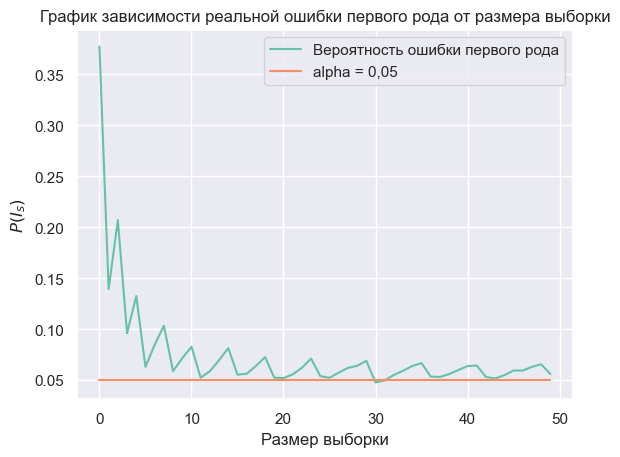

In [302]:
sample_count = 10000
sample_size = 50
theta=1
data = sps.poisson.rvs(theta, size= (sample_count, sample_size))
res=[]
# Построение доверительных интервалов
down, up = asymptotic_confidence_interval(data)
res = ((down > theta)| (up < theta)).sum(axis = 0)
result = (res)/sample_count
plt.plot(np.arange(0, sample_size), result, label = 'Вероятность ошибки первого рода')
plt.plot(np.arange(0, sample_size), 0.05*np.ones(sample_size), label = 'alpha = 0,05')
plt.title('График зависимости реальной ошибки первого рода от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('$P(I_s)$')
plt.legend()
plt.show()


**Вывод:** В случае маленькой выборки вероятность ошибки первого рода намного выше, влияние случайных отклонений намного сильнее. А при росте выборки ошибка стремится к значению $\alpha$

4. Что такое мощность критерия? Напишите для него формулу в условиях задачи.

**Ответ:**  Мощность критерия - вероятность отвергнуть $H_0$ при верности альтернативной гипотезы $H_1$ 

$\beta_s = P_{\theta}(\theta \not\in  (\hat{\theta} \pm z_{\alpha/2} \sqrt{\frac{\hat{\theta}}{n}}) | \theta \in \Theta_1)$

5. Аналогично алгоритму выше оцените мощность критерия в зависимости от размера выборки для $\theta \in \{0.3, 1.5, 2, 10\}$. Визуализируйте результат и сделайте выводы.

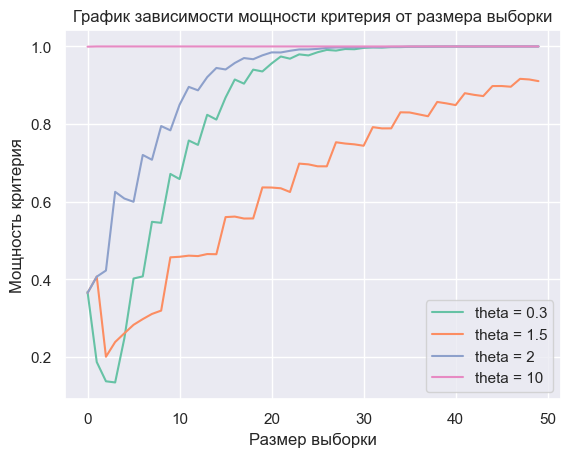

In [350]:
thetas = [0.3, 1.5, 2, 10]
sample_count = 10000
sample_size = 50
plt.figure()
data = sps.poisson.rvs(1, size= (sample_count, sample_size))
for theta in thetas:
    down, up = asymptotic_confidence_interval(data)
    res = ((down > theta)| (up < theta)).sum(axis = 0)
    result = (res)/sample_count
    plt.plot(np.arange(0, sample_size), result, label = 'theta = '+ str(theta))
plt.title('График зависимости мощности критерия от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Мощность критерия')
plt.legend()
plt.show()


**Вывод:** Мощность критерия растёт вместе с размером выборки. При очень высоких theta влияние случайных отклонений не играет значения, практически всегда отвергаем $H_0$ 

6. Для значений $n \in \{5, 15, 50\}$ оцените мощность критерия для параметра $\theta \in (0, 5)$ по сетке с шагом 0.01. Визуализируйте полученные зависимости и сделайте выводы.

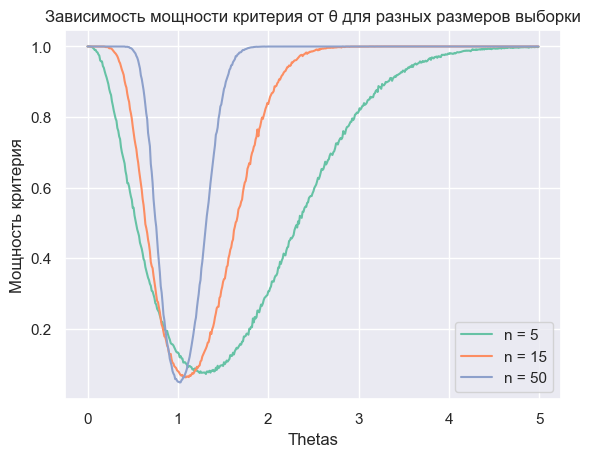

In [389]:
thetas = np.arange(0,5,0.01)
ns = [5, 15, 50]
power_results = {}

for n in ns:
    power = []
    for theta in thetas:
        samples = sps.poisson.rvs(theta, size=(sample_count, n))
        sample_means = np.mean(samples, axis=1)
        z = sps.norm.ppf(1 - alpha / 2)
        intervals = z * np.sqrt(sample_means / n)
        lower_bounds = sample_means - intervals
        upper_bounds = sample_means + intervals
        res = (theta_0 < lower_bounds) | (theta_0 > upper_bounds)
        power_value = np.mean(res)
        power.append(power_value)
    power_results[n] = power

plt.figure()
for n in ns:
    plt.plot(thetas, power_results[n], label='n = '+ str(n))
plt.xlabel('Thetas')
plt.ylabel('Мощность критерия')
plt.title('Зависимость мощности критерия от θ для разных размеров выборки')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** Минимальная мощность наблюдается на уровне $\alpha$ при $\theta = \theta _0$. По мере удаления от $\theta _0$ мощность растёт. С ростом выборки уменьшается вероятность ошибок второго рода, поэтому ветви растут быстрее.

## Задача 2

Проведен эксперимент, получены данные из экспоненциального распределения. 

In [395]:
sample = [0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
        0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252,
        0.00519983, 0.87588937, 0.44660739, 0.05967191, 0.05016975,
        0.05065286, 0.09068843, 0.18598196, 0.14138427, 0.08605575,
        0.23659272, 0.03755863, 0.08637888, 0.1140693 , 0.15223367,
        0.384484  , 0.05568397, 0.18050729, 0.22437618, 0.01189096]

Необходимо проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

$X_1, ... X_n$ &mdash; выборка из распределения $Exp(\lambda)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \lambda = 2$ vs. $\mathsf{H}_1\colon \lambda \neq 2$  
  

 
 

**1.** Из лекции вы узнали про критерий Вальда.
Для случая двусторонней альтернативы $\mathsf{H}_1\colon \theta \neq \theta_0$ критерий имел следующий вид:
$$\large{S = \left\{ \left|\sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}} \right| > z_{1 - \frac{\alpha}{2}} \right\}}$$

где $\hat{\theta}$ &mdash; асимптотически нормальная оценка $\theta$ с асимптотической дисперсией $\sigma^2(\theta)$, 
$\hat{\sigma}$ &mdash; состоятельная оценка $\sigma(\theta)$.  

Эквивалентный асимптотичсекий доверительный интервал для параметра $\theta$ уровня доверия $1-\alpha$
$$C = \left( \hat{\theta} - \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}, \hat{\theta} + \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}\right)$$

На первой лекции вы получали, что $\frac{1}{\overline{X}}$ &mdash; АНО для параметра $\theta$ c асимптотической дисперсией $\theta^2$


 **Выпишите состоятельную оценку дисперсии и статистику критерия Вальда**
 
 

**Ответ:** 
Статистика Вальде: $\sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}}$

Состоятельная оценка дисперсии: $\sqrt{\frac{1}{X^2}}$


На лекции вы узнали про p-value &mdash; это вероятность получить при справедливости $H_0$ такое значение статистики $t = T(x)$ или еще более экстремальное, то есть в случае двустороннего критерия
$$p(x) = \mathsf{P}_0(T(X) \geq|t|) + \mathsf{P}_0(T(X) \leq -|t|)$$
Для расчета можно использовать функции из библиотеки `scipy.stats`.

**2**. Оформите функцию подсчета статистики критерия, p-value и доверительного интервала 

In [412]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative='two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии
        оценки estimation_sigma
    param alternative: вид альтернативной гипотезы,
        может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    return conf_int - доверительный интервал
    """

    alpha = 0.05
    n = sample.shape[-1]
    statistics = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma

    if alternative == 'two_sided':
        z = sps.norm.ppf(1 - alpha / 2)
        right = estimation_theta + z * estimation_sigma / np.sqrt(n)
        left = estimation_theta - z * estimation_sigma / np.sqrt(n)
        return abs(statistics), (left, right), sps.norm.cdf(-statistics) + sps.norm.sf(statistics)
        
    if alternative == 'less':
        z = sps.norm.ppf(alpha)
        right = estimation_theta - z * estimation_sigma / np.sqrt(n)
        return statistics, right, sps.norm.cdf(statistics)
        
    if alternative == 'greater':
        z = sps.norm.ppf(1 - alpha)
        left = estimation_theta - z * estimation_sigma / np.sqrt(n)
        return statistics, left, sps.norm.sf(statistics)

**3**. Проверьте гипотезу с двусторонней альтернативой.

In [415]:
estimated_theta = 1 / np.mean(sample)
estimated_sigma = 1 / np.mean(sample)
theta = 2

In [417]:
cr = sps.norm.ppf(1 - 0.05)
sample = np.array(sample)
statistics, interval, p_value = wald_test(sample, theta, estimated_theta, estimated_sigma,'two_sided')
print(f'Статистика критерия (w) = {statistics}')
print(f'Пороговое значение (c) = {cr}')
print(f'Доверительный интервал:  ({interval}')
print(f'p-value: {p_value}')

Статистика критерия (w) = 3.2704505437191247
Пороговое значение (c) = 1.6448536269514722
Доверительный интервал:  ((3.187693843343649, 6.740324187101983)
p-value: 0.0010737631605120244


**Вывод:** По всем критериям нулевая гипотеза отвергается. Все критерии эквивалентны

**4**. Проверьте гипотезу с правосторонней альтернативой.

In [422]:
cr = sps.norm.ppf(1 - 0.05)
statistics, interval, p_value = wald_test(sample, theta, estimated_theta, estimated_sigma, 'greater')
print(f'статистика критерия (w) = {statistics}')
print(f'пороговое значение(c) = {cr}')
print(f'доверительный интервал:  ({interval},+бесконечность)')
print(f'p-value: {p_value}')

статистика критерия (w) = 3.2704505437191247
пороговое значение(c) = 1.6448536269514722
доверительный интервал:  (3.4732783303117714,+бесконечность)
p-value: 0.0005368815802560122


**Вывод:** Нулевая гипотеза отвергается

**5**. Проверьте гипотезу с левосторонней альтернативой.

In [426]:
cr = sps.norm.ppf(0.05)
statistics, interval, p_value = wald_test(sample, theta, estimated_theta, estimated_sigma,'less' )
print(f'статистика критерия (w)= {statistics}')
print(f'пороговое значение (c)= {cr}')
print(f'доверительный интервал:  (-бесконечность,{interval})')
print(f'p-value: {p_value}')

статистика критерия (w)= 3.2704505437191247
пороговое значение (c)= -1.6448536269514729
доверительный интервал:  (-бесконечность,6.454739700133861)
p-value: 0.999463118419744


**Вывод:** Параметр лежит в доверительном интервале, так что нулевая гипотеза не отвергается. Так же и по другим критериям она не отвергается

### <b><i><font color="orange">Сложная часть</font></i></b>

## Задача 3 (из прошлого ДЗ)

Получать высшее образование в университете решили $n$ первокурсников. Университет должен провести эксперимент по среднему времени уходу студентов в академический отпуск. Известно, что студенты могут уходить в академ в любой момент времени и по любой причине, вне зависимости от того, сколько времи на бот они уже потратили. Таким образом, распределение ушедших в академ не имеет свойства памяти, а таким свойством обладает только экспоненциальное распределение.

Высшее учебное заведение начало проводить эксперимент, но студенты оказались настолько умными, что за время эксперимента еще не все ушли в академический отпуск, а учебный отдел требует цифры, чтобы узнать, сколько новых корпусов нужно будет построить в следующем году. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. 

При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.

Будем использовать $c = 10$ (бакалавриат + магистратура + аспирантура), а в качестве истинного значения параметра возьмем $\theta = 0.15$. 

0. Сгенерируйте выборку $X$ размера 300 из экспоненциального распределения и, исходя из условий задачи, получите выборку $Y$. Для каждой из выборок постройте гистограмму ее распределения и на тот же график нанесите плотность экспоненциального распределения.

Рассмотрим, как можно применить метод максимального правдоподобия для построения оценок параметра $\theta$. Параметр $c$ считается известным &mdash; мы знаем, как долго шел эксперимент.

1. В чем состоит основная сложность изучаемого распределения с точки зрения метода максимального правдоподобия?

**Ответ:**

2. Чему равна ОМП для экспоненциального распределения с параметром масштаба $\theta$?

**Ответ:** 

3. В качестве первой оценки рассмотрите подвыборку из $Y_i < c$ и посчитайте значение ОМП для экспоненциального распределения. Выведите значение оценки, нарисуйте гистограммы выборок и плотность экспоненциального распределения с оцененным параметром. Совпала ли оценка с истинным значением?

**Ответ:** 

4. Попробуем улучшить результат. Рассмотрите подвыборку из $Y_i < c$, запишите для нее функцию правдоподобия с учетом того, что необходимо использовать не просто плотность распределения, а условную плотность (так как нам точно известно, что мы используем выборку с условием $Y_i < c$). Также напишите функцию, которая будет считать значение логарифма функции правдоподобия.

    *Напоминаем, что условная вероятность считается следующим образом: $P(A|B) = \dfrac{P(A \cap B)}{P(B)}$*

**Ответ:** 

In [ ]:
def loglikelihood(theta, Y, c):
    '''
    Считает логарифм функции правдоподобия

    :param theta: значение параметра масштаба экспоненциального распределения
    :param Y: выборка Y (см. условие задачи)
    :param c: параметр c распределения Y
    '''
    <...>

5. Определите максимум полученной функции по сетке с точностью до 0.001 и аналогично выше выведите значение оценки и визуализируйте результат. 

6. Реализуем другой вариант использования метода максимального правдоподобия. Алгоритм действия следующий:

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

7. Чему равна вероятность попасть в бин [k; k + 1), где k &mdash; натуральное число от 0 до c включительно (предполагаем, что в уловиях задачи с натуральное)?

**Ответ:** 

8. Чему равен логарифм функции правдоподобия?

**Ответ:** 

9. Чему равна ОМП в таком подходе?

**Ответ:** 

10. Реализуйте функцию подсчета оценки, выведите ее значение и визуализируйте результат аналогично выше.

11. Для двух оценок, полученных в пунктах 4-5 и 6-10, соответственно, нарисуйте зависимость их значений от размера выборки. Сделайте выводы.

**Вывод:** 